## Feature Engineering & Data Preprocessing AUC Dataset

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

%matplotlib inline

df = pd.read_csv('AUC.csv')

df.head(10)

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00
5,The Hunger Games: Special Edition,Writtenby:SuzanneCollins,Narratedby:TatianaMaslany,10 hrs and 35 mins,30-10-18,English,5 out of 5 stars72 ratings,656.00
6,Quest for the Diamond Sword,Writtenby:WinterMorgan,Narratedby:LukeDaniels,2 hrs and 23 mins,25-11-14,English,5 out of 5 stars11 ratings,233.00
7,The Dark Prophecy,Writtenby:RickRiordan,Narratedby:RobbieDaymond,12 hrs and 32 mins,02-05-17,English,5 out of 5 stars50 ratings,820.00
8,Merlin Mission Collection,Writtenby:MaryPopeOsborne,Narratedby:MaryPopeOsborne,10 hrs and 56 mins,02-05-17,English,5 out of 5 stars5 ratings,"1,256.00"
9,The Tyrant’s Tomb,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 22 mins,24-09-19,English,5 out of 5 stars58 ratings,820.00


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         87489 non-null  object
 1   author       87489 non-null  object
 2   narrator     87489 non-null  object
 3   time         87489 non-null  object
 4   releasedate  87489 non-null  object
 5   language     87489 non-null  object
 6   stars        87489 non-null  object
 7   price        87489 non-null  object
dtypes: object(8)
memory usage: 5.3+ MB


Remove unnecessary columns

In [46]:
cols_to_remove = ['name']
#df.drop(cols_to_remove, axis=1, inplace=True)


Put columns into consistent format

In [47]:



df['releasedate'] = pd.to_datetime(df['releasedate'])

df['narrator'] = df['narrator'].str.replace('^Narratedby:', '', regex=True)
df['author'] = df['author'].str.replace('^Writtenby:', '', regex=True)
df['ratings'] = df['stars'].str.extract(r'(\d+)(?=\s?ratings)')  
df['stars'] = df['stars'].str.extract(r'(\d\.\d)') 
fix_cols = ['price','stars','ratings']
df[fix_cols] = df[fix_cols].apply(pd.to_numeric, errors='coerce')

df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   name         87489 non-null  object        
 1   author       87489 non-null  object        
 2   narrator     87489 non-null  object        
 3   time         87489 non-null  object        
 4   releasedate  87489 non-null  datetime64[ns]
 5   language     87489 non-null  object        
 6   stars        4514 non-null   float64       
 7   price        78015 non-null  float64       
 8   ratings      9250 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 6.0+ MB


Checking missing values

In [48]:
import pandas as pd
import re


def convert_to_minutes(time_str):

    if type(time_str) is str:
        hours_match = re.search(r'(\d+)\s*hrs?', time_str)
        minutes_match = re.search(r'(\d+)\s*mins?', time_str)


        total_minutes = 0

        if hours_match:
            total_minutes += int(hours_match.group(1)) * 60  
        if minutes_match:
            total_minutes += int(minutes_match.group(1)) 
    else:
        total_minutes = time_str
    return total_minutes

df['time'] = df['time'].apply(convert_to_minutes)


In [49]:
df.head()

,name,author,narrator,time,releasedate,language,stars,price,ratings
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,140,2008-04-08,English,NaN,468.0,34.0
1,The Burning Maze,RickRiordan,RobbieDaymond,788,2018-01-05,English,4.5,820.0,41.0
2,The Deep End,JeffKinney,DanRussell,123,2020-06-11,English,4.5,410.0,38.0
3,Daughter of the Deep,RickRiordan,SoneelaNankani,676,2021-05-10,English,4.5,615.0,12.0
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,600,2010-01-13,English,4.5,820.0,181.0


In [50]:

df.isna().sum()

name               0
author             0
narrator           0
time               0
releasedate        0
language           0
stars          82975
price           9474
ratings        78239
dtype: int64

Checking duplicated values

In [51]:
df.duplicated().sum()

1

df = df.dropna(subset=['price'])

Handling Duplicated Values
- Removing duplicated rows

In [52]:

df.drop_duplicates(inplace=True)

df.duplicated().sum()

0

Visualize numerical columns with boxplot

In [53]:
num_cols = ['price', 'stars', 'time','ratings']

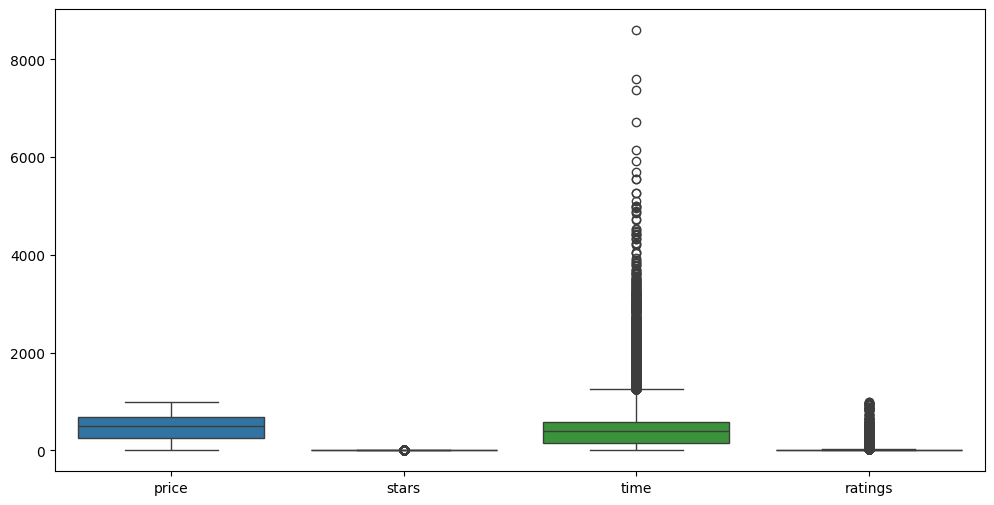

In [54]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols])
plt.show()

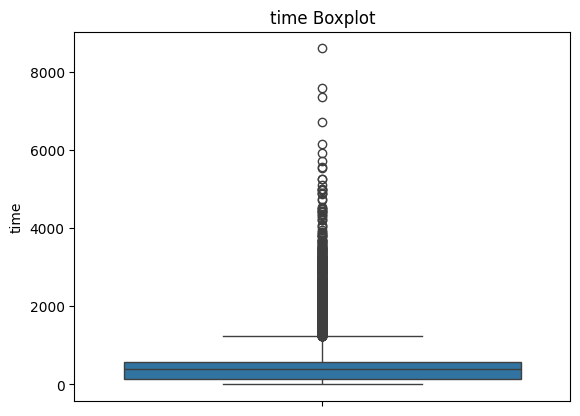

In [55]:
sns.boxplot(data=df['time'])
plt.title('time Boxplot')
plt.show()

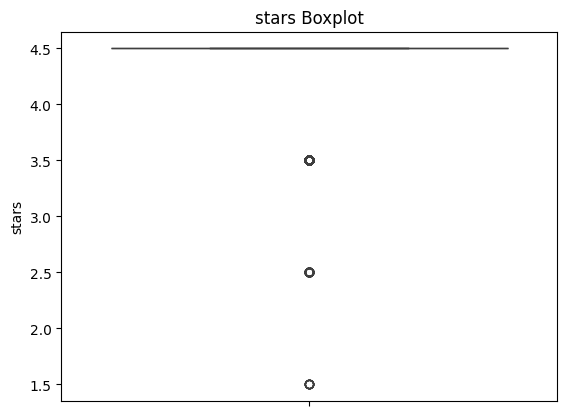

In [56]:
sns.boxplot(data=df['stars'])
plt.title('stars Boxplot')
plt.show()

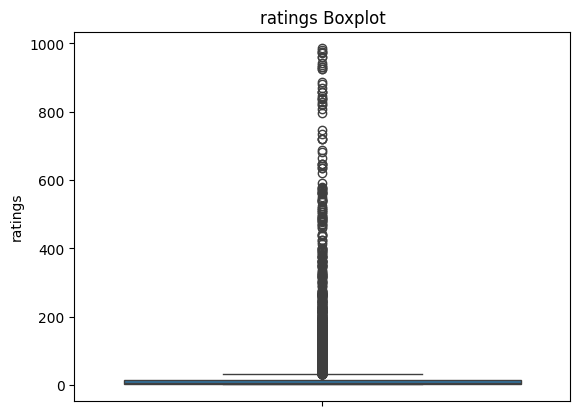

In [57]:
sns.boxplot(data=df['ratings'])
plt.title('ratings Boxplot')
plt.show()

Visualize numerical columns with Histogram Plot

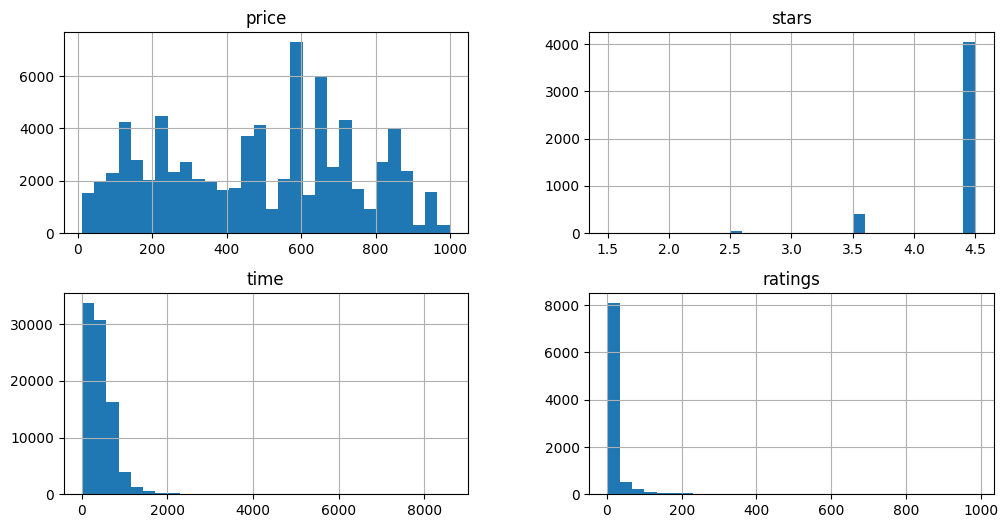

In [58]:
df[num_cols].hist(bins=30, figsize=(12, 6))
plt.show()


Reducing Outliers by Log-transforming `time` and `ratings` column

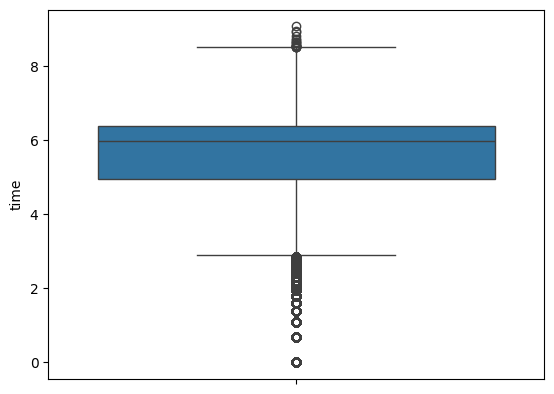

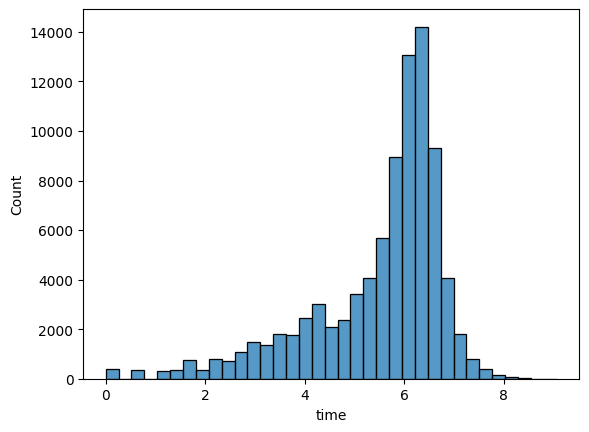

In [59]:
df['time'] = np.log(df['time'])

sns.boxplot(df['time'])
plt.show()

sns.histplot(df['time'], bins=35)
plt.show()

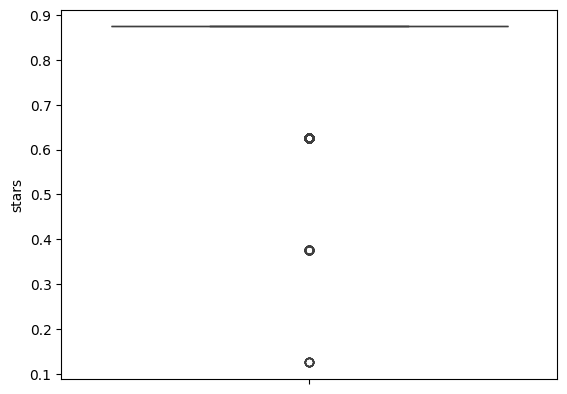

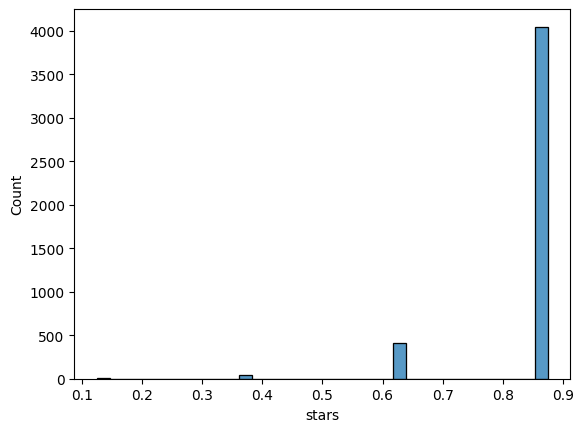

In [60]:
df['stars'] = (df['stars']-1)/4

sns.boxplot(df['stars'])
plt.show()

sns.histplot(df['stars'], bins=35)
plt.show()


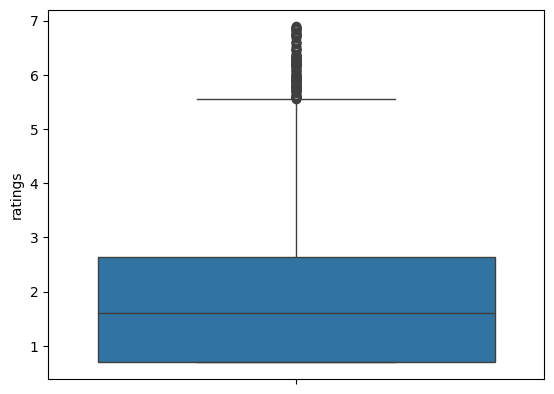

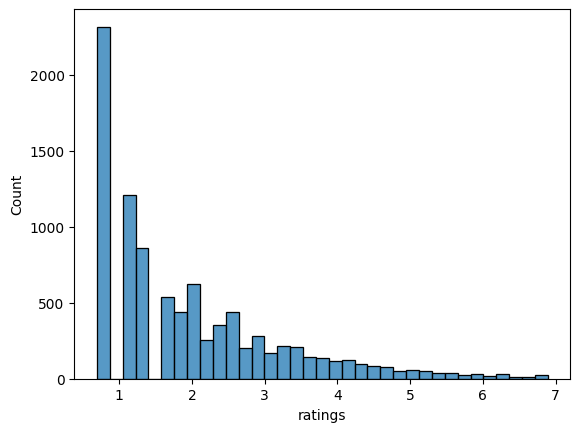

In [61]:
df['ratings'] = np.log(df['ratings'])

sns.boxplot(df['ratings'])
plt.show()

sns.histplot(df['ratings'], bins=35)
plt.show()



Split data into train & test to avoid data leakage

In [62]:
# Split data into training and testing sets
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((69990, 8), (17498, 8), (69990,), (17498,))

In [63]:
df.isna().sum()

name               0
author             0
narrator           0
time               0
releasedate        0
language           0
stars          82974
price           9473
ratings        78238
dtype: int64

Feature Scaling (numerical column only!!)

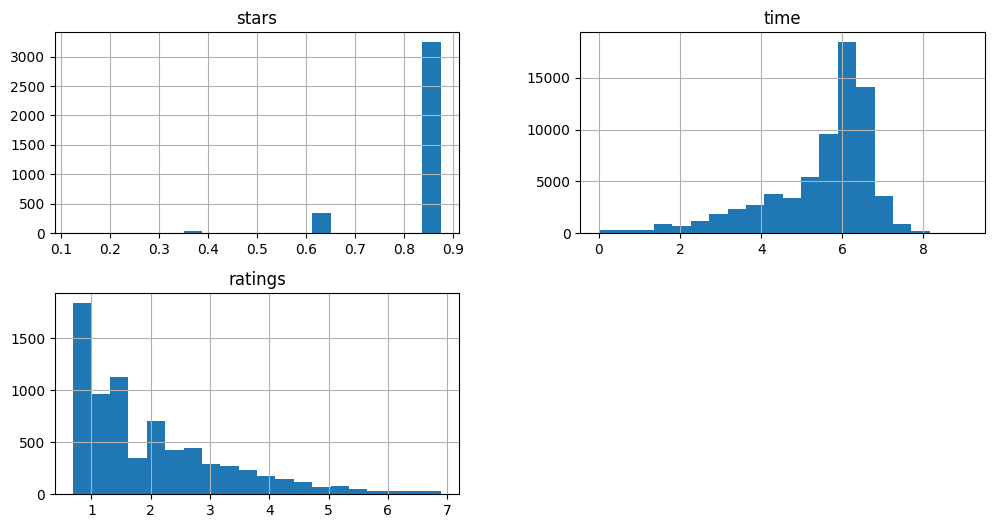

In [64]:
num_cols.remove('price')
X_train[num_cols].hist(bins=20, figsize=(12, 6))
plt.show()

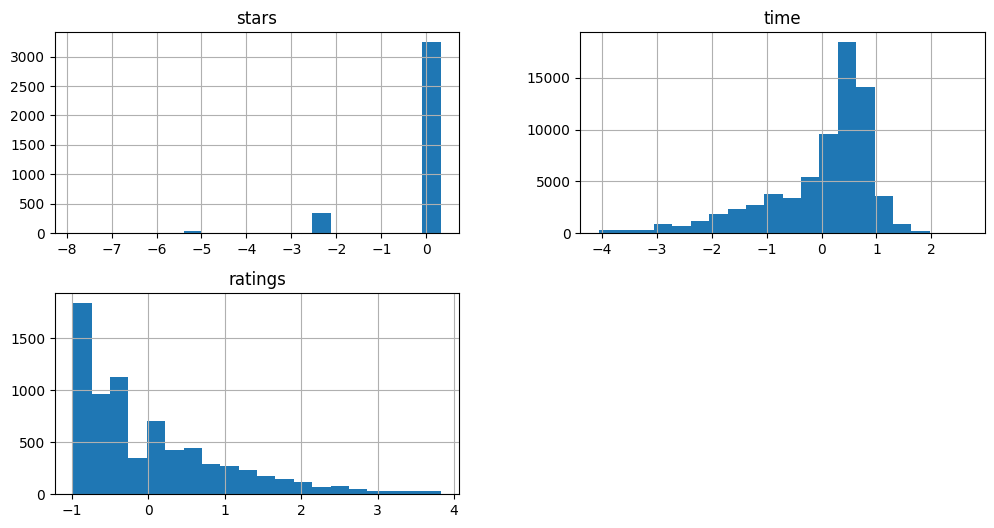

In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_train[num_cols].hist(bins=20, figsize=(12, 6))
plt.show()

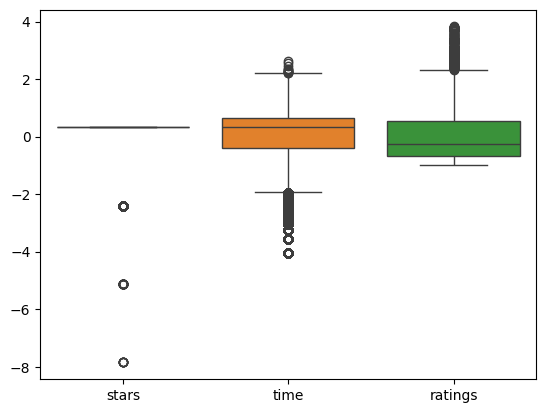

In [66]:
sns.boxplot(data=X_train[num_cols])
plt.show()

Handling Missing Values

In [67]:
X_train.isna().sum() / len(X_train)


name           0.000000
author         0.000000
narrator       0.000000
time           0.000000
releasedate    0.000000
language       0.000000
stars          0.948107
ratings        0.893942
dtype: float64

In [68]:
X_test.isna().sum() / len(X_test)

name           0.000000
author         0.000000
narrator       0.000000
time           0.000000
releasedate    0.000000
language       0.000000
stars          0.949594
ratings        0.895588
dtype: float64

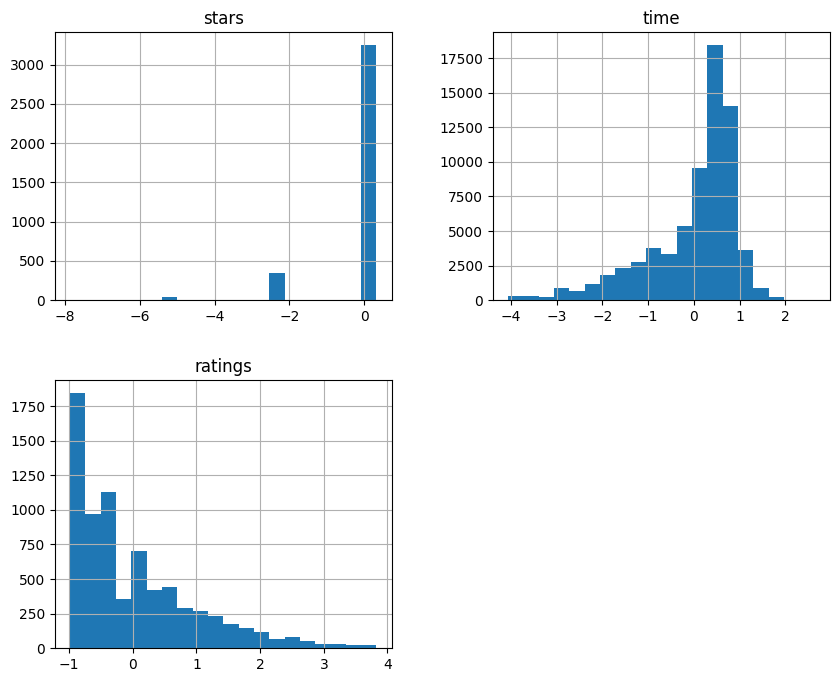

In [69]:
X_train[num_cols].hist(bins=20, figsize=(10, 8))
plt.show()

Check Skewness

In [70]:
X_train['ratings'].skew(), X_train['stars'].skew()

(1.2186190513324362, -3.4684753142688383)

Missing Value imputation

In [71]:
X_train['ratings'].fillna(X_train['ratings'].median(), inplace=True)
X_test['ratings'].fillna(X_test['ratings'].median(), inplace=True)

X_train['stars'].fillna(X_train['stars'].mean(), inplace=True)
X_test['stars'].fillna(X_test['stars'].mean(), inplace=True)

X_train.isna().sum() / len(X_train)

name           0.0
author         0.0
narrator       0.0
time           0.0
releasedate    0.0
language       0.0
stars          0.0
ratings        0.0
dtype: float64

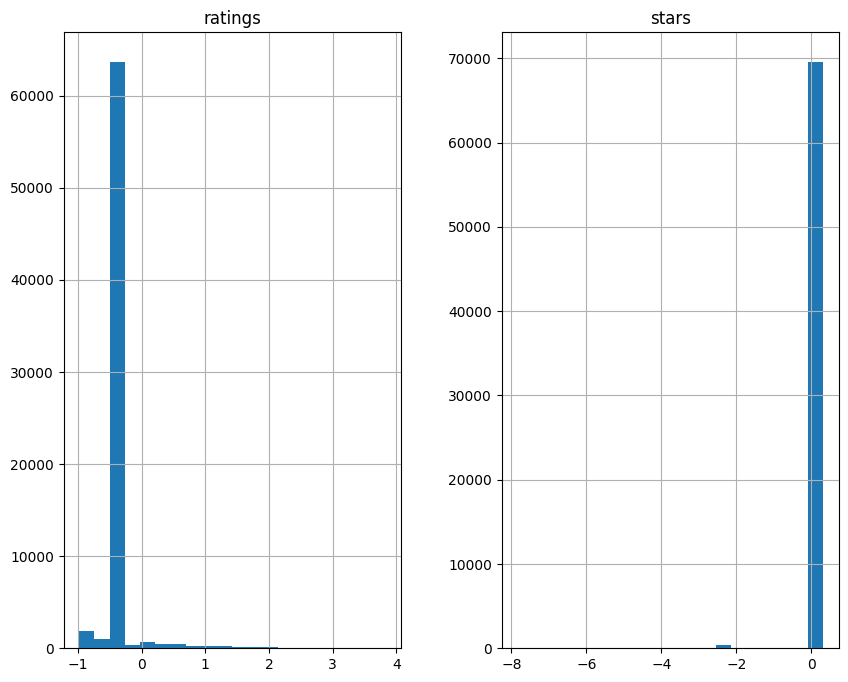

In [72]:
X_train[['ratings', 'stars']].hist(bins=20, figsize=(10, 8))
plt.show()

In [73]:
print(X_test.isna().sum())

name           0
author         0
narrator       0
time           0
releasedate    0
language       0
stars          0
ratings        0
dtype: int64


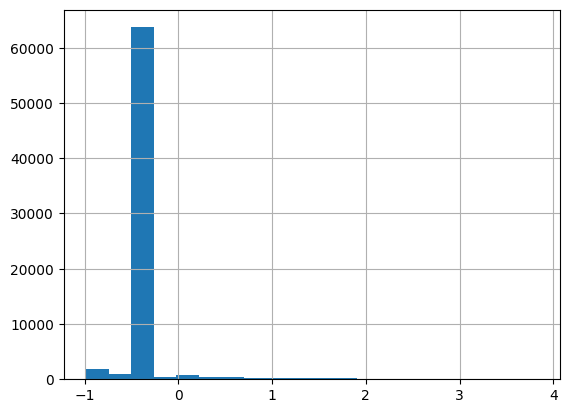

In [74]:
X_train['ratings'].hist(bins=20)
plt.show()


In [75]:
categorical_cols = X_train.select_dtypes(include=['object']).columns

print('-'*50)
for col in categorical_cols:
    print(X_train[col].value_counts())
    print('-'*50)

--------------------------------------------------
name
The Art of War                 17
Sterling Biographies           17
Pride and Prejudice            13
Sterling Point Books           12
The Science of Getting Rich    12
                               ..
Nurturing Healing Love          1
Your Leadership Moment          1
Models of the Mind              1
A Crown of Blood and Bone       1
第708回 新刊ラジオ第2部プレミアム　            1
Name: count, Length: 66737, dtype: int64
--------------------------------------------------
author
矢島雅弘,石橋遊                               670
SmartReading                           314
中西貴之,BJ                                235
div.                                   221
OnlineStudioProductions                172
                                      ... 
JoshOzersky                              1
CaralynBuehner,MarkBuehner               1
AlannaOkun                               1
JeanFrançoisMénard,MarieMalchelosse      1
SarahGraves                              

In [76]:
columns_to_lower = ['name', 'author', 'narrator', 'language']
for col in columns_to_lower:
    df[col] = df[col].str.lower()


In [77]:
categorical_cols = X_train.select_dtypes(include=['object']).columns

print('-'*50)
for col in categorical_cols:
    print(X_train[col].value_counts())
    print('-'*50)

--------------------------------------------------
name
The Art of War                 17
Sterling Biographies           17
Pride and Prejudice            13
Sterling Point Books           12
The Science of Getting Rich    12
                               ..
Nurturing Healing Love          1
Your Leadership Moment          1
Models of the Mind              1
A Crown of Blood and Bone       1
第708回 新刊ラジオ第2部プレミアム　            1
Name: count, Length: 66737, dtype: int64
--------------------------------------------------
author
矢島雅弘,石橋遊                               670
SmartReading                           314
中西貴之,BJ                                235
div.                                   221
OnlineStudioProductions                172
                                      ... 
JoshOzersky                              1
CaralynBuehner,MarkBuehner               1
AlannaOkun                               1
JeanFrançoisMénard,MarieMalchelosse      1
SarahGraves                              

Categorical Encoding

In [78]:
# one hot encode
categorical_cols = ['language']
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

X_train.head()


,name,author,narrator,time,releasedate,stars,ratings,language_Hindi,language_afrikaans,language_arabic,...,language_portuguese,language_romanian,language_russian,language_slovene,language_spanish,language_swedish,language_tamil,language_telugu,language_turkish,language_urdu
25763,Fatal Vows,JosephHosey,NickSummer,0.341544,2022-03-31,-4.734343e-16,-0.272998,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1671,Contes per a famílies felices,BegoñaIbarrola,CarmeAmbrós,-0.050551,2022-07-01,-4.734343e-16,-0.272998,False,False,False,...,False,False,False,False,False,False,False,False,False,False
65808,Sok út vezet a nirvánába,MérőLászló,FürAnikó,-1.109402,2019-05-31,-4.734343e-16,-0.272998,False,False,False,...,False,False,False,False,False,False,False,False,False,False
59836,La mala espera,MarceloLuján,JuanMagraner,0.527858,2021-10-29,-4.734343e-16,-0.272998,False,False,False,...,False,False,False,False,True,False,False,False,False,False
71292,Dragon Fever,DonnaGrant,AntonyFerguson,0.044525,2017-07-04,-4.734343e-16,-0.272998,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [79]:
X_train.columns

Index(['name', 'author', 'narrator', 'time', 'releasedate', 'stars', 'ratings',
       'language_Hindi', 'language_afrikaans', 'language_arabic',
       'language_basque', 'language_bulgarian', 'language_catalan',
       'language_czech', 'language_danish', 'language_dutch',
       'language_finnish', 'language_french', 'language_galician',
       'language_german', 'language_greek', 'language_hungarian',
       'language_icelandic', 'language_italian', 'language_japanese',
       'language_korean', 'language_lithuanian', 'language_mandarin_chinese',
       'language_norwegian', 'language_polish', 'language_portuguese',
       'language_romanian', 'language_russian', 'language_slovene',
       'language_spanish', 'language_swedish', 'language_tamil',
       'language_telugu', 'language_turkish', 'language_urdu'],
      dtype='object')

Label Encoding Target Values

In [80]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train = le.fit_transform(y_train)

y_train


array([353, 289, 111, ..., 716, 506,  88], dtype=int64)

In [81]:
X_train

,name,author,narrator,time,releasedate,stars,ratings,language_Hindi,language_afrikaans,language_arabic,...,language_portuguese,language_romanian,language_russian,language_slovene,language_spanish,language_swedish,language_tamil,language_telugu,language_turkish,language_urdu
25763,Fatal Vows,JosephHosey,NickSummer,0.341544,2022-03-31,-4.734343e-16,-0.272998,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1671,Contes per a famílies felices,BegoñaIbarrola,CarmeAmbrós,-0.050551,2022-07-01,-4.734343e-16,-0.272998,False,False,False,...,False,False,False,False,False,False,False,False,False,False
65808,Sok út vezet a nirvánába,MérőLászló,FürAnikó,-1.109402,2019-05-31,-4.734343e-16,-0.272998,False,False,False,...,False,False,False,False,False,False,False,False,False,False
59836,La mala espera,MarceloLuján,JuanMagraner,0.527858,2021-10-29,-4.734343e-16,-0.272998,False,False,False,...,False,False,False,False,True,False,False,False,False,False
71292,Dragon Fever,DonnaGrant,AntonyFerguson,0.044525,2017-07-04,-4.734343e-16,-0.272998,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,Akimbo and the Crocodile Man,AlexanderMcCallSmith,AlexanderMcCallSmith,-1.260878,2015-04-06,-4.734343e-16,-0.272998,False,False,False,...,False,False,False,False,False,False,False,False,False,False
54886,Dünenliebe,LotteRömer,"VerenaWolfien,TimGössler",0.445589,2021-07-29,-4.734343e-16,-0.272998,False,False,False,...,False,False,False,False,False,False,False,False,False,False
76820,That Deep River Feeling,JackieAshenden,AvaLucas,0.605938,2021-09-09,-4.734343e-16,-0.272998,False,False,False,...,False,False,False,False,False,False,False,False,False,False
860,The Jungle Book,RudyardKipling,CharlesMinx,0.220430,2010-10-22,-4.734343e-16,-0.272998,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [82]:
# merge label with feature
X_train['price'] = y_train
X_test['price'] = y_test

In [83]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69990 entries, 25763 to 15795
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   name                       69990 non-null  object        
 1   author                     69990 non-null  object        
 2   narrator                   69990 non-null  object        
 3   time                       69990 non-null  float64       
 4   releasedate                69990 non-null  datetime64[ns]
 5   stars                      69990 non-null  float64       
 6   ratings                    69990 non-null  float64       
 7   language_Hindi             69990 non-null  bool          
 8   language_afrikaans         69990 non-null  bool          
 9   language_arabic            69990 non-null  bool          
 10  language_basque            69990 non-null  bool          
 11  language_bulgarian         69990 non-null  bool          
 12  langu

In [84]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17498 entries, 43760 to 68320
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   name                       17498 non-null  object        
 1   author                     17498 non-null  object        
 2   narrator                   17498 non-null  object        
 3   time                       17498 non-null  float64       
 4   releasedate                17498 non-null  datetime64[ns]
 5   stars                      17498 non-null  float64       
 6   ratings                    17498 non-null  float64       
 7   language_Hindi             17498 non-null  bool          
 8   language_afrikaans         17498 non-null  bool          
 9   language_basque            17498 non-null  bool          
 10  language_bulgarian         17498 non-null  bool          
 11  language_catalan           17498 non-null  bool          
 12  langu

In [85]:
print("Train missing data:", X_train.isna().sum().sum(), "\nTest missing data:", X_test.isna().sum().sum())
print()
print("Train duplicated data:", X_train.duplicated().sum(), "\nTest duplicated data:", X_test.duplicated().sum())


Train missing data: 0 
Test missing data: 1908

Train duplicated data: 0 
Test duplicated data: 0


### Done!